Datos procesados:
  nombres  Programacion  Calculo  Ingles  PROMEDIO       Estatus
0     Ana           8.0        9    10.0  9.000000      Aprobado
1    Luis           7.0        8     5.0  6.666667      Aprobado
2   Pedro           5.0        7     8.0  6.666667      Aprobado
3   Marta           9.0        8     7.0  8.000000      Aprobado
4   Julia          10.0        9     8.0  9.000000      Aprobado
5  Carlos           5.0        6     5.0  5.333333  Recuperación
--- ALUMNOS REPROBADOS ---


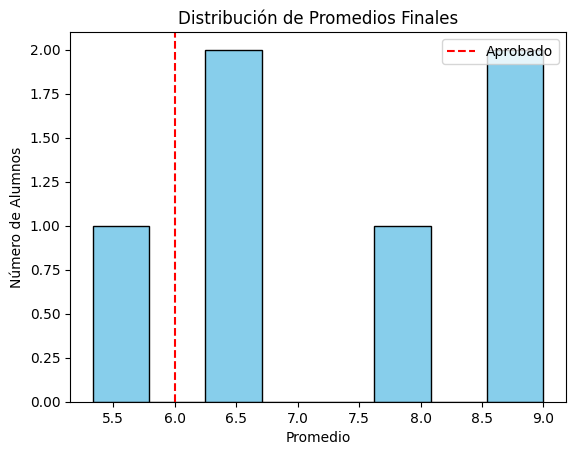

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Constantes globales para las notas de corte
NOTA_APROBADO = 6.0
NOTA_RECUPERACION = 5.0

def crear_dataframe_alumnos():
    """
    Crea y carga el dataframe con los datos de los alumnos.

    Returns:
        pd.DataFrame: DataFrame con los datos de los alumnos.
    """
    datos = {
        'nombres': ['Ana', 'Luis', 'Pedro', 'Marta', 'Julia', 'Carlos'],
        'Programacion': [8, 7, np.nan, 9, 10, 5],
        'Calculo': [9, 8, 7, 8, 9, 6],
        'Ingles': [10, np.nan, 8, 7, 8, np.nan]
    }
    return pd.DataFrame(datos)

def limpiar_datos(df):
    """
    Limpia los datos faltantes, reemplazándolos con un valor específico.

    Args:
        df (pd.DataFrame): DataFrame con los datos originales.

    Returns:
        pd.DataFrame: DataFrame limpio con los valores faltantes reemplazados.
    """
    df['Programacion'] = df['Programacion'].fillna(NOTA_RECUPERACION)
    df['Ingles'] = df['Ingles'].fillna(NOTA_RECUPERACION)
    return df

def calcular_promedios(df):
    """
    Calcula el promedio de las notas de cada alumno.

    Args:
        df (pd.DataFrame): DataFrame con las calificaciones de los alumnos.

    Returns:
        pd.Series: Serie con los promedios de cada alumno.
    """
    return df[['Programacion', 'Calculo', 'Ingles']].mean(axis=1)

def asignar_estatus(promedios):
    """
    Asigna un estatus a cada alumno basado en su promedio.

    Args:
        promedios (pd.Series): Serie con los promedios de los alumnos.

    Returns:
        List: Lista con los estatus asignados ('Aprobado', 'Recuperación', 'Reprobado').
    """
    estatus = []
    for promedio in promedios:
        if promedio > NOTA_APROBADO:
            estatus.append('Aprobado')
        elif promedio >= NOTA_RECUPERACION:
            estatus.append('Recuperación')
        else:
            estatus.append('Reprobado')
    return estatus

def visualizar_distribucion(df):
    """
    Genera un histograma con la distribución de los promedios de los alumnos.

    Args:
        df (pd.DataFrame): DataFrame con los promedios de los alumnos.
    """
    plt.hist(df['PROMEDIO'], bins=8, color='skyblue', edgecolor='black')
    plt.title('Distribución de Promedios Finales')
    plt.xlabel('Promedio')
    plt.ylabel('Número de Alumnos')
    plt.axvline(x=NOTA_APROBADO, color='red', linestyle='--', label='Aprobado')
    plt.legend()
    plt.show()

def main():
    """
    Función principal que orquesta el flujo del programa, ejecutando las funciones en el orden adecuado.
    """
    # Paso 1: Crear y cargar los datos
    df = crear_dataframe_alumnos()

    # Paso 2: Limpiar los datos
    df = limpiar_datos(df)

    # Paso 3: Calcular los promedios
    df['PROMEDIO'] = calcular_promedios(df)

    # Paso 4: Asignar estatus a los alumnos
    df['Estatus'] = asignar_estatus(df['PROMEDIO'])

    # Paso 5: Mostrar los datos procesados
    print("Datos procesados:")
    print(df)

    # Paso 6: Filtrar y mostrar los alumnos reprobados
    alumnos_reprobados = df[df['Estatus'] == 'Reprobado']
    print("--- ALUMNOS REPROBADOS ---")
    for nombre in alumnos_reprobados['nombres']:
        print(nombre)

    # Paso 7: Visualizar la distribución de los promedios
    visualizar_distribucion(df)

# Llamada a la función main para ejecutar el programa
if __name__ == "__main__":
    main()
